In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
import phial.node_functions as nf
import phial.experiment as ex
from phial.utils import tic,toc
from phial.experiment import Experiment
tic() # start tracking time of Notebook load

## From Larissa's 2015 paper https://www.mdpi.com/1099-4300/17/8/5472

In [2]:
import numpy as np
tpm=np.array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
cm=np.array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1]], dtype=np.uint8)
G = nx.DiGraph(cm)
net = tb.Net(edges=G.edges(), tpm=tpm)
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['A(0): 2,MJ_func',
  'B(1): 2,MJ_func',
  'C(2): 2,MJ_func',
  'D(3): 2,MJ_func',
  'E(4): 2,MJ_func',
  'F(5): 2,MJ_func'],
 'num_unreachable_states': 32}

In [3]:
%time net.phi('000011')

Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 0, 1, 1]


CPU times: user 1.4 s, sys: 116 ms, total: 1.52 s
Wall time: 28.2 s


20.906248

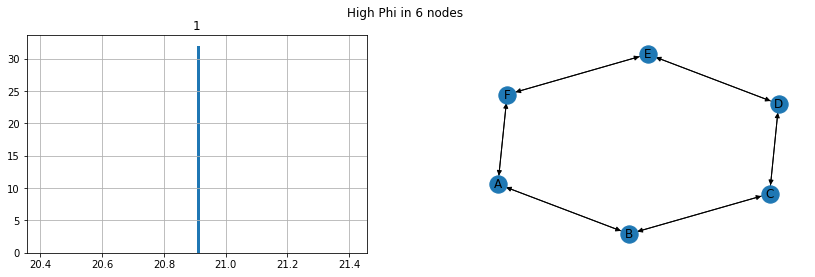

In [4]:
exp = Experiment([],
    net=net,
    title='High Phi in 6 nodes',
    comment='From Larissas 2015 paperm https://www.mdpi.com/1099-4300/17/8/5472',
    )
exp.run()

In [5]:
exp.info()

{'timestamp': '2020-05-11 13:54:27.074039',
 'duration': 885.5426129640546,
 'results': {'011011': 20.906248,
  '101101': 20.906248,
  '111100': 20.906248,
  '111111': 20.906248,
  '000000': 20.906248,
  '110000': 20.906248,
  '001010': 20.906248,
  '100001': 20.906248,
  '101110': 20.906248,
  '000101': 20.906248,
  '010111': 20.906248,
  '001001': 20.906248,
  '111001': 20.906248,
  '100010': 20.906248,
  '101011': 20.906248,
  '001111': 20.906248,
  '000011': 20.906248,
  '100111': 20.906248,
  '110110': 20.906248,
  '010001': 20.906248,
  '010100': 20.906248,
  '010010': 20.906248,
  '110011': 20.906248,
  '000110': 20.906248,
  '011110': 20.906248,
  '100100': 20.906248,
  '110101': 20.906248,
  '111010': 20.906248,
  '011000': 20.906248,
  '011101': 20.906248,
  '101000': 20.906248,
  '001100': 20.906248},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x8

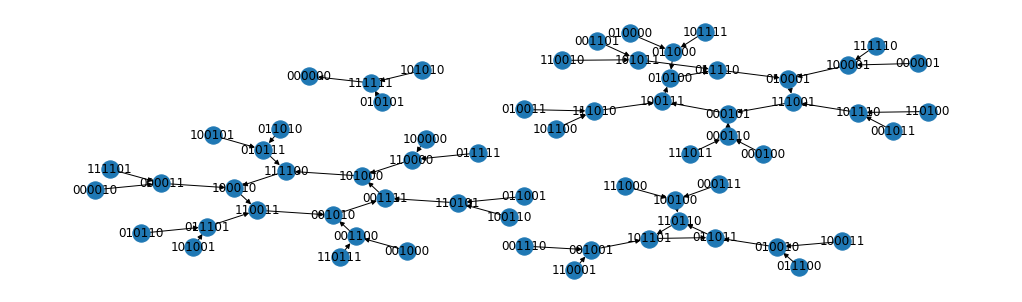

In [6]:
import pyphi.convert
import pandas as pd
tpm_sbs = pyphi.convert.state_by_node2state_by_state(tpm)
states = tb.all_states(len(net), backwards=True)
tpm_df = pd.DataFrame(tpm_sbs, index=states, columns=states)
tpm_df
S = nx.DiGraph(tpm_df)
nx.draw(S, pos=pydot_layout(S), with_labels=True)

In [8]:
len(exp.net.unreachable_states)

32

In [9]:
len(exp.net.in_states)

64

In [11]:
exp.net.out_states

{'000000',
 '000011',
 '000101',
 '000110',
 '001001',
 '001010',
 '001100',
 '001111',
 '010001',
 '010010',
 '010100',
 '010111',
 '011000',
 '011011',
 '011101',
 '011110',
 '100001',
 '100010',
 '100100',
 '100111',
 '101000',
 '101011',
 '101101',
 '101110',
 '110000',
 '110011',
 '110101',
 '110110',
 '111001',
 '111010',
 '111100',
 '111111'}

In [7]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')

Elapsed seconds=886.6682815800887
Completed on: 2020-05-11 14:09:13.742425
